In [1]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2024-01-10 20:59:06.458051: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 20:59:06.493630: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 20:59:06.493663: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 20:59:06.493688: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 20:59:06.499843: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 20:59:06.500232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_uri = '../modelh5/model_CNN_FT_KFold_2_2.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 110, 64)           256       
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 55, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_35 (Conv1D)          (None, 53, 32)            6176      
                                                                 
 max_pooling1d_35 (MaxPooli  (None, 27, 32)            0         
 ng1D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 864)               0         
                                                                 
 dense_34 (Dense)            (None, 64)              

In [3]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [4]:
dataset_path = '../data/testing_10/'

In [5]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db1', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD2, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.chroma_stft(y=cD2, sr=8000)
                cqt = np.abs(librosa.cqt(y=cD2, sr=sr, n_bins=60))
                combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=276
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=441
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=221
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=315
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=263
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=505
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=253
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=362
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=364
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=262
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: N


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=266
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=316
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=264
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=322
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=323
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=488
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=244
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=282
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=275
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=279
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=353
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=329
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=366
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=368
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=371
  warnings.warn(


In [6]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-259.435059,71.753044,-75.655418,-46.517323,-51.230511,-61.359035,-15.299903,14.763763,2.244828,...,0.079466,0.054560,0.048193,0.030039,0.015535,0.016994,0.015653,0.011302,0.006620,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-194.986816,68.026634,-37.463318,-36.958408,-44.937714,-35.735619,-33.635490,-24.146961,-14.229823,...,0.033946,0.038931,0.025973,0.009332,0.008308,0.009896,0.012826,0.010492,0.004798,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-268.952942,28.890039,-76.753143,-19.114367,-23.242184,-29.864834,-19.700861,-15.233142,-11.460514,...,0.010681,0.008474,0.006964,0.009068,0.008698,0.007626,0.009001,0.008416,0.007931,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-267.620819,70.848503,-69.401962,-49.486439,-48.335682,-59.542900,-13.712475,13.646317,1.313628,...,0.072814,0.043940,0.025325,0.020341,0.013398,0.012024,0.008834,0.010713,0.007516,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-299.945099,71.049118,-42.108425,-26.536041,-28.141096,-11.485309,-31.075947,-43.731731,-44.228344,...,0.012571,0.012492,0.010933,0.011502,0.011249,0.011259,0.014421,0.017166,0.016017,MVP


In [7]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 3ms/step
===
[1.1965963e-03 7.8776549e-04 5.4273141e-07 9.9798566e-01 2.9409890e-05]
Actual class: 3
Predicted class: MVP
===
===
[0.04941516 0.41044807 0.33751103 0.16984856 0.03277718]
Actual class: 1
Predicted class: MR
===
===
[8.5448250e-02 2.3844363e-01 2.1467746e-05 6.7539442e-01 6.9222337e-04]
Actual class: 3
Predicted class: MVP
===
===
[1.3768560e-03 7.0880516e-05 1.9333843e-06 9.9849999e-01 5.0328203e-05]
Actual class: 3
Predicted class: MVP
===
===
[4.2035113e-04 3.6458053e-02 1.0606417e-02 2.8701630e-01 6.6549885e-01]
Actual class: 4
Predicted class: N
===
===
[2.1837007e-03 2.1697300e-04 2.3908376e-06 9.9757862e-01 1.8282155e-05]
Actual class: 3
Predicted class: MVP
===
===
[5.0557463e-04 2.5674732e-05 4.1092912e-04 9.9782914e-01 1.2286091e-03]
Actual class: 3
Predicted class: MVP
===
===
[5.3814892e-03 8.8520450e-05 6.9546431e-06 9.9449855e-01 2.4581501e-05]
Actual class: 3
Predicted class: MVP
===
===
[8.325987e-05 1.744567e-03 

In [9]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 2, 17,  0,  0,  1],
       [ 1,  1, 16,  2,  0],
       [ 0,  2,  0, 17,  1],
       [ 0,  0,  0,  0, 20]])

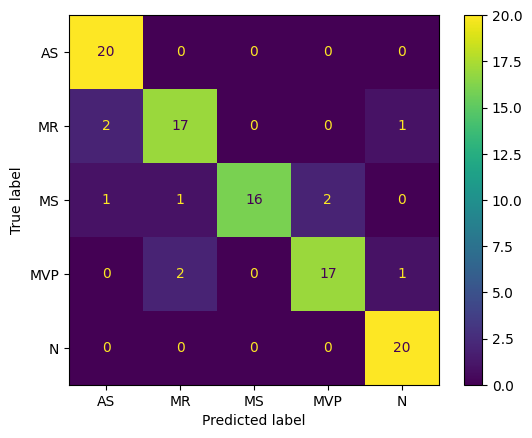

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [11]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [12]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))

Sensitivity : [1.   0.85 0.8  0.85 1.  ] mean:  0.9
Specificity : [0.9625 0.9625 1.     0.975  0.975 ] mean:  0.975
Precision : [0.86956522 0.85       1.         0.89473684 0.90909091] mean:  0.9046785937174953
Accuracy : [0.97 0.94 0.96 0.95 0.98] mean:  0.9600000000000002
FPR : [0.0375 0.0375 0.     0.025  0.025 ] mean:  0.025
FNR : [0.   0.15 0.2  0.15 0.  ] mean:  0.1
NPV : [1.         0.9625     0.95238095 0.96296296 1.        ] mean:  0.9755687830687829
FDR : [0.13043478 0.15       0.         0.10526316 0.09090909] mean:  0.09532140628250467
f1_score: [0.93023256 0.85       0.88888889 0.87179487 0.95238095] mean:  0.8986594542408495
